
Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:tensorflow’:

    train




The following object is masked from ‘package:httr’:

    progress




Model: "model"
________________________________________________________________________________
 Layer (type)         Output Shape   Param #  Connected to           Trainable  
 input_2 (InputLayer)  [(None, 224,   0       []                     Y          
                      224, 3)]                                                  
 tf.image.rgb_to_hsv   (None, 224, 2  0       ['input_2[0][0]']      Y          
 (TFOpLambda)         24, 3)                                                    
 tf.__operators__.get  (None, 224, 2  0       ['tf.image.rgb_to_hsv  Y          
 item (SlicingOpLambd  24)                    [0][0]']                          
 a)                                                                             
 tf.__operators__.get  (None, 224, 2  0       ['tf.image.rgb_to_hsv  Y          
 item_1 (SlicingOpLam  24)                    [0][0]']                          
 bda)                                                                           
 tf.math.grea

Class-to-Index Mapping:


Benign  Early    Pre    Pro 
     0      1      2      3 



Mappings and counts in full dataset:


  original_class numeric_class count
1         Benign             0   504
2          Early             1   985
3            Pre             2   963
4            Pro             3   804



Mappings and counts in training dataset:


  original_class numeric_class count
1         Benign             0   323
2          Early             1   631
3            Pre             2   617
4            Pro             3   515



Class distribution in full dataset:



Benign  Early    Pre    Pro 
   504    985    963    804 



Class distribution in training dataset:



Benign  Early    Pre    Pro 
   323    631    617    515 



Final Class Weights (based on train dataset):


$`0`
[1] 1.614551

$`1`
[1] 0.8264659

$`2`
[1] 0.8452188

$`3`
[1] 1.012621




Validation:


Total samples in full dataset: 2086 


Sum of class counts: 2086 


Number of classes: 4 


Maximum weight ratio: 1.95356 



Verification of weight calculation:


Benign: count=323, weight=1.6146, count*weight=521.5000
Early: count=631, weight=0.8265, count*weight=521.5000
Pre: count=617, weight=0.8452, count*weight=521.5000
Pro: count=515, weight=1.0126, count*weight=521.5000


Test Loss: 0.141642 


Test Accuracy: 0.9960938 


Confusion Matrix and Statistics

          Reference
Prediction Benign Early Pre Pro
    Benign     80     1   0   0
    Early       0   156   1   0
    Pre         0     0 152   0
    Pro         0     0   0 128

Overall Statistics
                                          
               Accuracy : 0.9961          
                 95% CI : (0.9861, 0.9995)
    No Information Rate : 0.3031          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9948          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Benign Class: Early Class: Pre Class: Pro
Sensitivity                 1.0000       0.9936     0.9935     1.0000
Specificity                 0.9977       0.9972     1.0000     1.0000
Pos Pred Value              0.9877       0.9936     1.0000     1.0000
Neg Pred Value              1.0000       0.9972     0.9973     1.0000
Prevale


Class-Specific Statistics:


              Sensitivity Specificity Pos Pred Value Neg Pred Value Precision
Class: Benign   1.0000000   0.9977169      0.9876543      1.0000000 0.9876543
Class: Early    0.9936306   0.9972299      0.9936306      0.9972299 0.9936306
Class: Pre      0.9934641   1.0000000      1.0000000      0.9972678 1.0000000
Class: Pro      1.0000000   1.0000000      1.0000000      1.0000000 1.0000000
                 Recall        F1 Prevalence Detection Rate
Class: Benign 1.0000000 0.9937888  0.1544402      0.1544402
Class: Early  0.9936306 0.9936306  0.3030888      0.3011583
Class: Pre    0.9934641 0.9967213  0.2953668      0.2934363
Class: Pro    1.0000000 1.0000000  0.2471042      0.2471042
              Detection Prevalence Balanced Accuracy
Class: Benign            0.1563707         0.9988584
Class: Early             0.3030888         0.9954302
Class: Pre               0.2934363         0.9967320
Class: Pro               0.2471042         1.0000000



Confusion Matrix Mode:


[1] "sens_spec"



Additional Arguments Passed to confusionMatrix():


list()


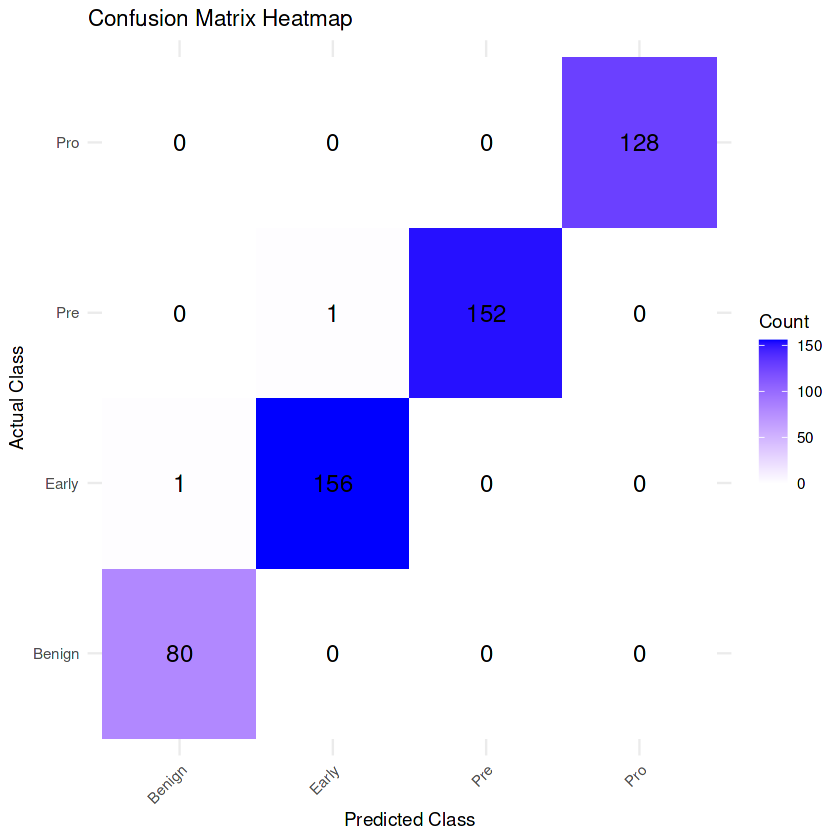

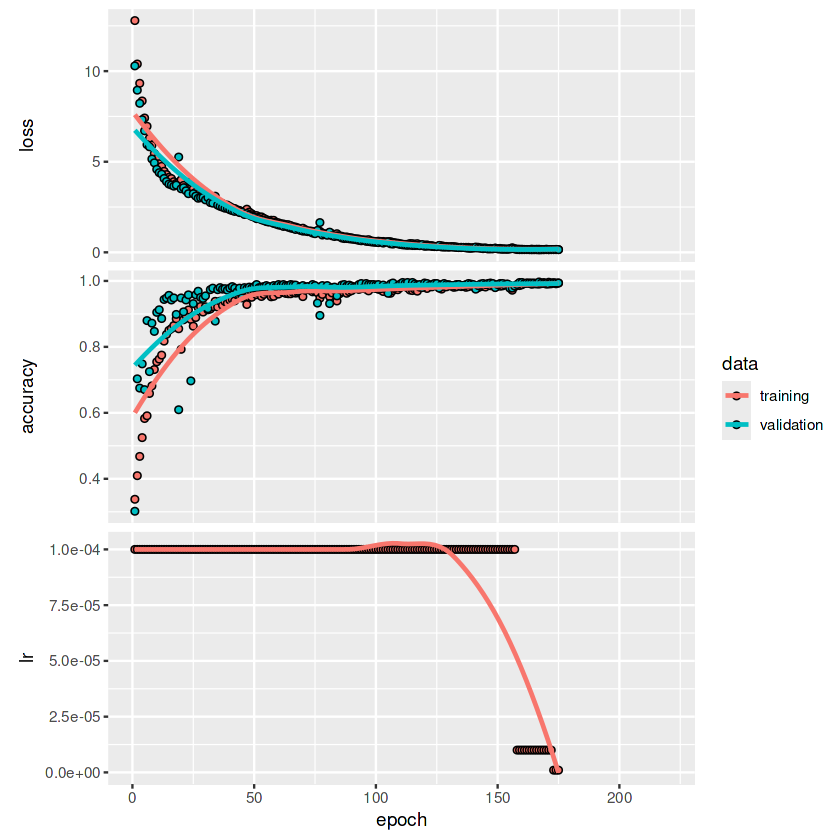

Final Training Loss: 0.1507337 


Final Validation Loss: 0.1507337 


Final Train Accuracy: 0.9936709 


Final Validation Accuracy: 0.99375 



Cost-Weighted Misclassification Matrix:


       Benign Early Pre Pro
Benign      0    10   0   0
Early       0     0  15   0
Pre         0     0   0   0
Pro         0     0   0   0


Total Misclassification Cost: 25 


Average Cost Per Sample: 0.04826255 


Cost-Sensitive Accuracy: 0.9991225 


Weighted F1-score 0.9960352 


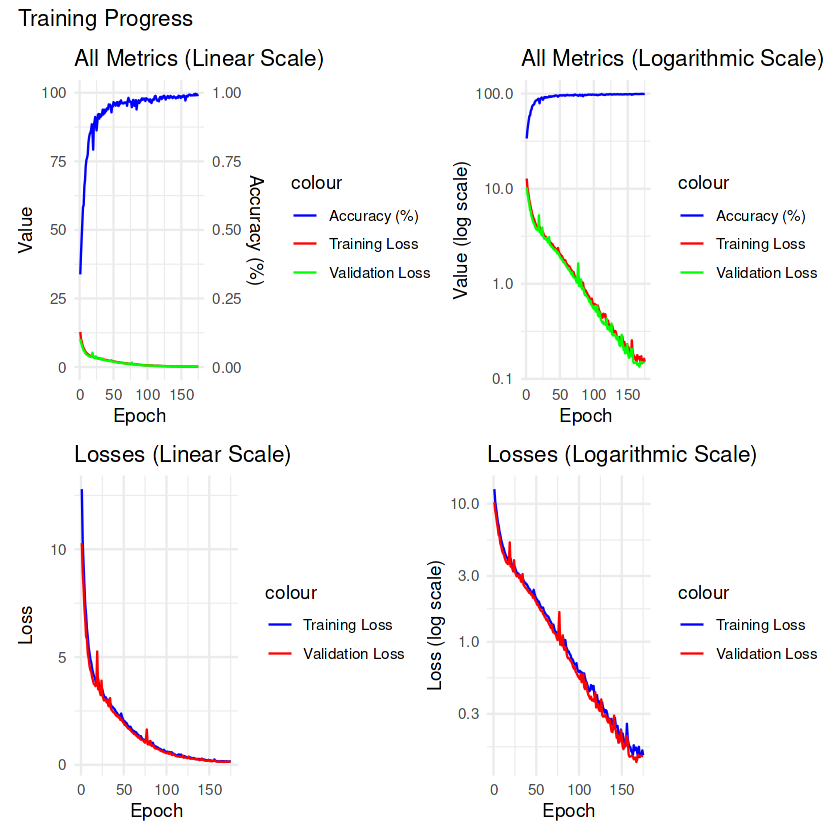

In [ ]:
# Load necessary libraries
library(keras)
library(tensorflow)
library(dplyr)  # For data manipulation
library(tidyverse)  # For tidyverse functions
library(caret)  # For confusionMatrix and stratified sampling

# Set the path to your dataset
data_dir <- "/kaggle/input/leukemia-images/Original"

# Define image size and parameters for ConvNeXT
img_height <- 224
img_width <- 224
batch_size <- 32
epochs <- 220

# Gather file paths and corresponding labels
file_paths <- c()
class_labels <- c()

for (class in c("Benign", "Early", "Pre", "Pro")) {
  class_path <- file.path(data_dir, class)
  files <- list.files(class_path, full.names = TRUE)
  unique_files <- unique(files)
  file_paths <- c(file_paths, unique_files)
  class_labels <- c(class_labels, rep(class, length(unique_files)))
}

# Create DataFrame with the necessary structure
full_df <- data.frame(
  image_filename = file_paths,
  class = class_labels,
  stringsAsFactors = FALSE
)

# Stratified split into training (64%), validation (20%), and test (16%) sets
set.seed(123)
trainIndex <- createDataPartition(full_df$class, p = 0.64, list = FALSE)
train_df <- full_df[trainIndex, ]
remaining_df <- full_df[-trainIndex, ]

# Shuffle only train_df
train_df <- train_df[sample(nrow(train_df)), ]

# Split the remaining 36% into validation (20%) and test (16%)
validationIndex <- createDataPartition(remaining_df$class, p = 20 / (20 + 16), list = FALSE)
val_df <- remaining_df[validationIndex, ]
test_df <- remaining_df[-validationIndex, ]

# Load ConvNeXT model from TensorFlow using tf$keras$applications$ConvNeXtBase
base_model <- tf$keras$applications$ConvNeXtBase(
  weights = 'imagenet',
  include_top = FALSE,
  input_shape = as.integer(c(img_height, img_width, 3))
)

# Freeze most of the layers of the base model, but unfreeze the top few layers for fine-tuning
for (layer in base_model$layers[1:100]) {
  layer$trainable <- FALSE
}
for (layer in base_model$layers[101:length(base_model$layers)]) {
  layer$trainable <- TRUE
}

# Set the color threshold for purple in HSV space
lower_purple <- c(0.7, 0.5, 0.4)  # Adjust as needed
upper_purple <- c(0.8, 1.0, 1.0)  # Adjust as needed

# Define the model input layer
input_image <- layer_input(shape = c(img_height, img_width, 3))

# Convert the input image to HSV
input_image_hsv <- tf$image$rgb_to_hsv(input_image)

# Create a binary mask for purple regions (lymphoblasts) based on the HSV threshold
mask_purple <- tf$math$logical_and(
  input_image_hsv[,,,1] >= lower_purple[1], input_image_hsv[,,,1] <= upper_purple[1]
)
mask_purple <- tf$math$logical_and(mask_purple, input_image_hsv[,,,2] >= lower_purple[2])
mask_purple <- tf$math$logical_and(mask_purple, input_image_hsv[,,,3] >= lower_purple[3])

# Convert logical mask to float and expand dims to match RGB channels
mask_purple <- tf$cast(mask_purple, dtype = tf$float32)  # Ensure the mask is a float tensor
mask_purple <- tf$expand_dims(mask_purple, axis = as.integer(-1)) # Add a channel dimension
mask_purple <- tf$tile(mask_purple, multiples = as.integer(c(1, 1, 1, 3)))  # Repeat for each color channel

# Apply the mask to the original RGB image
segmented_image <- tf$math$multiply(input_image, mask_purple)

# Pass the segmented image into segmentation block
# Modified U-Net inspired segmentation block with color-based segmentation
# Contracting Path (Encoder) with fewer filters
conv1 <- layer_conv_2d(segmented_image, filters = 32, kernel_size = c(3, 3), activation = "relu", padding = "same")
conv1 <- layer_conv_2d(conv1, filters = 32, kernel_size = c(3, 3), activation = "relu", padding = "same")
pool1 <- layer_max_pooling_2d(conv1, pool_size = c(2, 2))

conv2 <- layer_conv_2d(pool1, filters = 64, kernel_size = c(3, 3), activation = "relu", padding = "same")
conv2 <- layer_conv_2d(conv2, filters = 64, kernel_size = c(3, 3), activation = "relu", padding = "same")
pool2 <- layer_max_pooling_2d(conv2, pool_size = c(2, 2))

conv3 <- layer_conv_2d(pool2, filters = 128, kernel_size = c(3, 3), activation = "relu", padding = "same")
conv3 <- layer_conv_2d(conv3, filters = 128, kernel_size = c(3, 3), activation = "relu", padding = "same")
pool3 <- layer_max_pooling_2d(conv3, pool_size = c(2, 2))

# Bottleneck layer with fewer filters
conv4 <- layer_conv_2d(pool3, filters = 256, kernel_size = c(3, 3), activation = "relu", padding = "same")
conv4 <- layer_conv_2d(conv4, filters = 256, kernel_size = c(3, 3), activation = "relu", padding = "same")

# Expansive Path (Decoder) with skip connections and fewer filters

# Upsampling + skip connection from conv3
upconv3 <- layer_conv_2d_transpose(conv4, filters = 128, kernel_size = c(3, 3), strides = c(2, 2), padding = "same")
concat3 <- layer_concatenate(list(upconv3, conv3))
conv5 <- layer_conv_2d(concat3, filters = 128, kernel_size = c(3, 3), activation = "relu", padding = "same")
conv5 <- layer_conv_2d(conv5, filters = 128, kernel_size = c(3, 3), activation = "relu", padding = "same")

# Upsampling + skip connection from conv2
upconv2 <- layer_conv_2d_transpose(conv5, filters = 64, kernel_size = c(3, 3), strides = c(2, 2), padding = "same")
concat2 <- layer_concatenate(list(upconv2, conv2))
conv6 <- layer_conv_2d(concat2, filters = 64, kernel_size = c(3, 3), activation = "relu", padding = "same")
conv6 <- layer_conv_2d(conv6, filters = 64, kernel_size = c(3, 3), activation = "relu", padding = "same")

# Upsampling + skip connection from conv1
upconv1 <- layer_conv_2d_transpose(conv6, filters = 32, kernel_size = c(3, 3), strides = c(2, 2), padding = "same")
concat1 <- layer_concatenate(list(upconv1, conv1))
conv7 <- layer_conv_2d(concat1, filters = 32, kernel_size = c(3, 3), activation = "relu", padding = "same")
conv7 <- layer_conv_2d(conv7, filters = 32, kernel_size = c(3, 3), activation = "relu", padding = "same" )

# Feature extraction using ConvNeXT
features <- base_model(input_image)
features <- layer_global_average_pooling_2d(features)

# Flatten and concatenate segmentation output with ConvNeXT features
segmentation_features <- layer_flatten(conv5)
combined_features <- layer_concatenate(list(features, segmentation_features))

# Dense layers with L2 regularization, batch normalization, and increased dropout
x <- layer_dense(combined_features, units = 512, activation = "relu", kernel_regularizer = regularizer_l2(0.01))
x <- layer_batch_normalization(x)
x <- layer_dropout(x, rate = 0.7)  # Increased dropout rate to 0.7

x <- layer_dense(x, units = 256, activation = "relu", kernel_regularizer = regularizer_l2(0.01))
x <- layer_batch_normalization(x)
x <- layer_dropout(x, rate = 0.7)  # Increased dropout rate to 0.7

x <- layer_dense(x, units = 128, activation = "relu", kernel_regularizer = regularizer_l2(0.01))
x <- layer_batch_normalization(x)
x <- layer_dropout(x, rate = 0.7)  # Increased dropout rate to 0.7

output <- layer_dense(x, units = length(unique(full_df$class)), activation = "softmax")

# Create the model
model <- keras_model(inputs = input_image, outputs = output)

# Compile the model with a lower learning rate to prevent overfitting
model %>% compile(
  loss = loss_categorical_crossentropy(),
  optimizer = optimizer_adam(learning_rate = 1e-4),  # Lower learning rate to prevent overfitting
  metrics = c("accuracy")
)

print(model)

# Define the class-to-index mapping
classes <- c("Benign", "Early", "Pre", "Pro")
class_to_index <- setNames(0:(length(classes) - 1), classes)

# Add numeric columns to both full and training DataFrames
full_df$class_numeric <- as.numeric(factor(full_df$class, levels = classes)) - 1
train_df$class_numeric <- as.numeric(factor(train_df$class, levels = classes)) - 1

# Verify the class-to-index mapping
cat("Class-to-Index Mapping:\n")
print(class_to_index)

# Create improved mapping displays with counts
cat("\nMappings and counts in full dataset:\n")
unique_mapping_full <- data.frame(
  original_class = classes,
  numeric_class = 0:(length(classes)-1),
  count = as.vector(table(full_df$class))
)
print(unique_mapping_full)

cat("\nMappings and counts in training dataset:\n")
unique_mapping_train <- data.frame(
  original_class = classes,
  numeric_class = 0:(length(classes)-1),
  count = as.vector(table(train_df$class))
)
print(unique_mapping_train)

# Calculate class weights using the train dataset
n_samples <- nrow(train_df)
n_classes <- length(classes)

# Get class frequencies from train dataset
class_counts <- table(train_df$class_numeric)

# Calculate balanced weights
class_weights <- n_samples / (n_classes * class_counts)

# Convert to a named list with numeric indices as names
class_weights <- as.list(class_weights)
names(class_weights) <- as.character(0:(n_classes-1))

# Print diagnostics
cat("\nClass distribution in full dataset:\n")
print(table(full_df$class))
cat("\nClass distribution in training dataset:\n")
print(table(train_df$class))

cat("\nFinal Class Weights (based on train dataset):\n")
print(class_weights)

# Validation steps
cat("\nValidation:\n")
cat("Total samples in full dataset:", n_samples, "\n")
cat("Sum of class counts:", sum(class_counts), "\n")
cat("Number of classes:", n_classes, "\n")
cat("Maximum weight ratio:", max(unlist(class_weights)) / min(unlist(class_weights)), "\n\n")

# Additional validation checks
cat("Verification of weight calculation:\n")
for(i in 0:(n_classes-1)) {
  class_name <- classes[i+1]
  weight <- class_weights[[as.character(i)]]
  count <- class_counts[as.character(i)]
  cat(sprintf("%s: count=%d, weight=%.4f, count*weight=%.4f\n",
              class_name, count, weight, count*weight))
}

# Create a data generator with augmentation (no augmentation on validation set)
datagen_train <- image_data_generator(
  rescale = 1/255,
  rotation_range = 40,  # Increased rotation range for more variability
  width_shift_range = 0.4,  # Increased shift range for more variability
  height_shift_range = 0.4,  # Increased shift range for more variability
  shear_range = 0.4,  # Increased shear range for more variability
  zoom_range = 0.4,  # Increased zoom range for more variability
  horizontal_flip = TRUE
)

datagen_val <- image_data_generator(
  rescale = 1/255
)

datagen_test <- image_data_generator(
  rescale = 1/255
)

# Custom generator for training and validation (no augmentation on validation set)
train_generator <- flow_images_from_dataframe(
  train_df,
  directory = data_dir,
  x_col = "image_filename",
  y_col = "class",
  target_size = c(img_height, img_width),
  batch_size = batch_size,
  class_mode = "categorical",
  generator = datagen_train
)

val_generator <- flow_images_from_dataframe(
  val_df,
  directory = data_dir,
  x_col = "image_filename",
  y_col = "class",
  target_size = c(img_height, img_width),
  batch_size = batch_size,
  class_mode = "categorical",
  generator = datagen_val,
  shuffle = FALSE,
)

test_generator <- flow_images_from_dataframe(
  test_df,
  directory = data_dir,
  x_col = "image_filename",
  y_col = "class",
  target_size = c(img_height, img_width),
  batch_size = batch_size,
  class_mode = "categorical",
  generator = datagen_test,
  shuffle = FALSE,
)

# Initialize an empty vector to store the learning rate values
lr_values <- numeric(0)

# Custom callback to track the learning rate during training
callback_lr_tracker <- callback_lambda(
  on_epoch_begin = function(epoch, logs) {
    lr_values <<- c(lr_values, as.numeric(model$optimizer$lr))  # Store learning rate at the start of each epoch
  }
)


# Train the model with class weights and validation
history <- model %>% fit(
  train_generator,
  epochs = epochs,
  steps_per_epoch = nrow(train_df) / batch_size,
  validation_data = val_generator,
  validation_steps = nrow(val_df) / batch_size,
  class_weight = class_weights,
  callbacks = list(
    callback_early_stopping(monitor = "val_loss", patience = 8, restore_best_weights = TRUE),  # Increased patience
    callback_reduce_lr_on_plateau(monitor = "val_loss", factor = 0.1, patience = 5),
    callback_model_checkpoint("best_model.h5", monitor = "val_loss", save_best_only = TRUE),  # Save the best model
    callback_lr_tracker
  )
)



# Retrieve the class labels as defined in the test generator
class_indices <- test_generator$class_indices  # This is a named list
# Reverse the class_indices to map indices back to labels
index_to_label <- names(class_indices)[order(unlist(class_indices))]

# Evaluate the model on the test data
evaluation_metrics <- model %>% evaluate(
  test_generator,
  steps = nrow(test_df) / batch_size
)

# Extract the evaluation metrics (test loss and accuracy)
test_loss <- evaluation_metrics[1]
test_accuracy <- evaluation_metrics[2]

cat("Test Loss:", test_loss, "\n")
cat("Test Accuracy:", test_accuracy, "\n")

# Calculate the number of steps for test predictions
steps <- ceiling(nrow(test_df) / batch_size)

# Make predictions on the test set
predictions <- model %>% predict(test_generator, steps = steps)

# Map the predicted indices to class labels using index_to_label
predicted_classes <- factor(apply(predictions, 1, function(x) index_to_label[which.max(x)]), levels = index_to_label)

# Get true labels from the test data frame (already in factor form)
true_classes <- factor(test_df$class, levels = index_to_label)

# Calculate the confusion matrix
conf_matrix <- confusionMatrix(predicted_classes, true_classes)

# Print confusion matrix details
print(conf_matrix)

cat("\nClass-Specific Statistics:\n")
print(conf_matrix$byClass)

cat("\nConfusion Matrix Mode:\n")
print(conf_matrix$mode)

cat("\nAdditional Arguments Passed to confusionMatrix():\n")
print(conf_matrix$dots)

# Extract the confusion matrix table as a data frame
cm_table <- as.data.frame(as.table(conf_matrix))

# Rename the columns for easier reference
colnames(cm_table) <- c("Predicted", "Actual", "Count")

# Plot the confusion matrix as a heatmap using ggplot2
ggplot(cm_table, aes(x = Predicted, y = Actual, fill = Count)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "blue") +
  theme_minimal() +
  labs(title = "Confusion Matrix Heatmap",
       x = "Predicted Class",
       y = "Actual Class") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(aes(label = Count), color = "black", size = 5)  # Add text labels with the count in each tile

plot(history)

                                  # Assuming you have already trained the model and have the `history` object
library(ggplot2)

# Create a data frame for plotting
history_df <- data.frame(
  epoch = 1:length(history$metrics$loss),
  loss = history$metrics$loss,
  val_loss = history$metrics$val_loss,
  accuracy = history$metrics$accuracy,
  val_accuracy = history$metrics$val_accuracy,
  lr = lr_values   # Add the learning rate history
)

# Create history_df to include loss, accuracy, and learning rate values
history_df <- data.frame(
  epoch = 1:length(history$metrics$loss),
  loss = history$metrics$loss,
  val_loss = history$metrics$val_loss,
  accuracy = history$metrics$accuracy,
  val_accuracy = history$metrics$val_accuracy,
  lr = lr_values   # Add the learning rate history
)

library(ggplot2)
library(patchwork)

# Linear scale plots
plot1 <- ggplot(history_df, aes(x = epoch)) +
  geom_line(aes(y = loss, color = 'Training Loss')) +
  geom_line(aes(y = val_loss, color = 'Validation Loss')) +
  geom_line(aes(y = accuracy * 100, color = 'Accuracy (%)')) +
  scale_y_continuous(sec.axis = sec_axis(~./100, name = "Accuracy (%)")) +
  labs(title = "All Metrics (Linear Scale)", x = "Epoch", y = "Value") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red", "green"))

# Logarithmic scale plots
plot2 <- ggplot(history_df, aes(x = epoch)) +
  geom_line(aes(y = loss, color = 'Training Loss')) +
  geom_line(aes(y = val_loss, color = 'Validation Loss')) +
  geom_line(aes(y = accuracy * 100, color = 'Accuracy (%)')) +
  scale_y_log10() +
  labs(title = "All Metrics (Logarithmic Scale)", x = "Epoch", y = "Value (log scale)") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red", "green"))

# Loss linear scale
plot3 <- ggplot(history_df, aes(x = epoch)) +
  geom_line(aes(y = loss, color = 'Training Loss')) +
  geom_line(aes(y = val_loss, color = 'Validation Loss')) +
  labs(title = "Losses (Linear Scale)", x = "Epoch", y = "Loss") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red"))

# Loss logarithmic scale
plot4 <- ggplot(history_df, aes(x = epoch)) +
  geom_line(aes(y = loss, color = 'Training Loss')) +
  geom_line(aes(y = val_loss, color = 'Validation Loss')) +
  scale_y_log10() +
  labs(title = "Losses (Logarithmic Scale)", x = "Epoch", y = "Loss (log scale)") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red"))

# Combine all plots into a single grid
combined_plot <- (plot1 | plot2) / (plot3 | plot4) +
  plot_annotation(title = "Training Progress")

# Print combined plot
print(combined_plot)

# Get final training and validation accuracy from the history object
final_train_accuracy <- history$metrics$accuracy[length(history$metrics$accuracy)]
final_val_accuracy <- history$metrics$val_accuracy[length(history$metrics$val_accuracy)]

# Extract the final training loss from the history object
final_train_loss <- history$metrics$loss[length(history$metrics$loss)]
final_val_loss <- history$metrics$loss[length(history$metrics$val_loss)]

# Print the final training loss
cat("Final Training Loss:", final_train_loss, "\n")
cat("Final Validation Loss:", final_val_loss, "\n")
cat("Final Train Accuracy:", final_train_accuracy, "\n")
cat("Final Validation Accuracy:", final_val_accuracy, "\n")

# Evaluating classification cost
# Define the cost matrix (replace with your actual costs)
cost_matrix <- matrix(
  c(0, 10, 20, 30,   # Benign -> Benign, Early, Pre, Pro
    10, 0, 15, 25,    # Early -> Benign, Early, Pre, Pro
    20, 15, 0, 10,    # Pre -> Benign, Early, Pre, Pro
    30, 25, 10, 0),   # Pro -> Benign, Early, Pre, Pro
  nrow = 4, byrow = TRUE
)
rownames(cost_matrix) <- c("Benign", "Early", "Pre", "Pro")
colnames(cost_matrix) <- c("Benign", "Early", "Pre", "Pro")

# Extract confusion matrix data
cm_table <- conf_matrix$table
classes <- rownames(cm_table)

visualize_cost_confusion_matrix <- function(conf_matrix, cost_matrix) {
  # Extract the confusion matrix from caret's result
  cm_table <- conf_matrix$table

  # Create cost-weighted matrix
  cost_weighted_cm <- matrix(0,
                              nrow = nrow(cost_matrix),
                              ncol = ncol(cost_matrix))

  for (i in 1:nrow(cm_table)) {
    for (j in 1:ncol(cm_table)) {
      if (i != j) {
        cost_weighted_cm[i, j] <- cm_table[i, j] * cost_matrix[i, j]
      }
    }
  }

  # Set row and column names
  rownames(cost_weighted_cm) <- rownames(cost_matrix)
  colnames(cost_weighted_cm) <- colnames(cost_matrix)

  return(cost_weighted_cm)
}

# Usage
cost_weighted_matrix <- visualize_cost_confusion_matrix(conf_matrix, cost_matrix)
cat("\nCost-Weighted Misclassification Matrix:\n")
print(cost_weighted_matrix)

# Initialize total misclassification cost
total_cost <- 0

# Calculate total misclassification cost by iterating over confusion matrix entries
for (i in 1:nrow(cm_table)) {
  for (j in 1:ncol(cm_table)) {
    if (i != j) {  # Misclassifications (i != j)
      total_cost <- total_cost + cm_table[i, j] * cost_matrix[i, j]
    }
  }
}

# Output the total misclassification cost
cat("Total Misclassification Cost:", total_cost, "\n")

# Calculate average cost per sample
total_samples <- sum(cm_table)
avg_cost_per_sample <- total_cost / total_samples
cat("Average Cost Per Sample:", avg_cost_per_sample, "\n")

# Calculate cost-sensitive accuracy
# Compute the maximum possible cost (if all instances were misclassified to the most costly class)
max_possible_cost <- sum(cost_matrix) * (total_samples / nrow(cost_matrix))
cost_sensitive_accuracy <- 1 - (total_cost / max_possible_cost)
cat("Cost-Sensitive Accuracy:", cost_sensitive_accuracy, "\n")

# Using cost matrix for cost-weighted F1 calculation
f1_scores <- conf_matrix$byClass[, "F1"]
weights <- 1 / (diag(cost_matrix) + 1)  # Add 1 to avoid divide-by-zero
weights <- weights / sum(weights)
weighted_f1 <- sum(f1_scores * weights, na.rm = TRUE)
cat("Weighted F1-score", weighted_f1, "\n")

# Save the trained model as a tensorflow file
save_model_tf(model, "/kaggle/working/convnext_model_tf")